# Part a. Scratch Gradient Descent

In [1]:
import pandas as pd

In [26]:
data1 = pd.read_csv("hw2_data1.csv", header = None)
data2 = pd.read_csv("hw2_data2.csv", header = None)

In [27]:
data1.head()

,0,1
0,0,2.568544
1,1,4.073480
2,2,8.436981
3,3,7.518266
4,4,12.353161


In [28]:
data2.head()

,0,1
0,0,6.607242
1,1,6.531462
2,2,84.397762
3,3,9.024567
4,4,12.602170


In [29]:
len(data2)

100

In [51]:
def gd (actual_xs, actual_ys, initial_m, initial_c, leanrning_rate,number_of_iterations):
    
    m = initial_m
    c = initial_c
    n = len(actual_xs)
    for i in range(number_of_iterations):
        total_m  = 0
        total_c = 0
        for j in range(len(actual_xs)):
            #print(actual_xs[j])
            y_predict = m*actual_xs[j] + c
            error_m = (y_predict-actual_ys[j])*actual_xs[j]
            error_c = y_predict-actual_ys[j]
            total_m += error_m
            total_c += error_c
        
        m_new = m - leanrning_rate*(2)*total_m/n
        c_new = c - leanrning_rate*(2)*total_c/n
        m = m_new
        c = c_new
        #print(m)
    
    
    
    return m, c

In [56]:
gd(data1[0], data1[1], 0, 0, 0.0001, 100)

(2.0459370744521914, 0.044262268341917134)

In [57]:
gd(data2[0], data2[1], 0, 0, 0.0001, 100)

(43.123893860556024, 7.13530682624119)

# Part b. Scratch SSE function

In [89]:
def calculate_SSE(actual_ys,actual_xs,m,c):
    SSE = 0
    for i in range(len(actual_ys)):
        y_predict = m*actual_xs[i] + c
        sse = (y_predict - actual_ys[i])**2
        SSE = SSE + sse
    
    return SSE

In [95]:
m1, c1 = gd(data1[0], data1[1], 0, 0, 0.0001, 100)
print(m1,c1)

2.0459370744521914 0.044262268341917134


In [96]:
calculate_SSE(data1[1], data1[0],  m1, c1)

271.72931439460257

In [100]:
m2, c2 = gd(data2[0], data2[1], 0, 0, 0.0001, 100)

In [101]:
calculate_SSE(data2[1], data2[0],m2, c2)

39200353727.15802

The SSE for dataset1 is 271 and for dataset2 is 39200353727

# Part c. Scratch Residual Functions

In [109]:
import matplotlib.pyplot as plt

In [122]:
def residuals(actual_ys,actual_xs,m,c):
    df = []
    for i in range(len(actual_ys)):
        y_predict = m*actual_xs[i] + c
        difference = y_predict - actual_ys[i]
        df.append(difference)
    return df

In [123]:
residual_1 = residuals(data1[1], data1[0],  m1, c1)

In [125]:
residual_2 = residuals(data2[1], data2[0],  m2, c2)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1., 97.]),
 array([-195617.30803012, -185632.752191  , -175648.19635189,
        -165663.64051277, -155679.08467365, -145694.52883453,
        -135709.97299541, -125725.41715629, -115740.86131718,
        -105756.30547806,  -95771.74963894,  -85787.19379982,
         -75802.6379607 ,  -65818.08212158,  -55833.52628246,
         -45848.97044335,  -35864.41460423,  -25879.85876511,
         -15895.30292599,   -5910.74708687,    4073.80875225]),
 <a list of 20 Patch objects>)

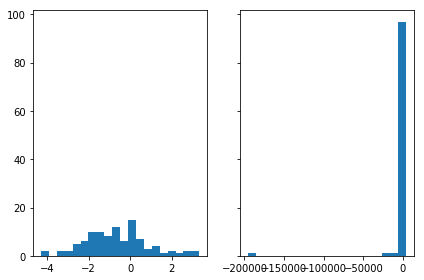

In [126]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = 20
axs[0].hist(residual_1, bins=n_bins)
axs[1].hist(residual_2, bins=n_bins)

The sum sqare error of linear regresesion of dataset one is far less than linear regresesion of dataset two. The reason of this result is because residuals of dataset one follows normal distribution, while dataset two doesn't. And there exit outliers in dataset two also. 